In [43]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import date
import matplotlib as mpl

# LAB 07: Probability
## IMDB 5000 Movies Dataset
## Keith Eckert 3-27-18

In [44]:
imdb = pd.read_csv('./data/movie_metadata.csv')
imdb = imdb.drop_duplicates()

In [45]:
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [46]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 28 columns):
color                        4979 non-null object
director_name                4895 non-null object
num_critic_for_reviews       4949 non-null float64
duration                     4983 non-null float64
director_facebook_likes      4895 non-null float64
actor_3_facebook_likes       4975 non-null float64
actor_2_name                 4985 non-null object
actor_1_facebook_likes       4991 non-null float64
gross                        4124 non-null float64
genres                       4998 non-null object
actor_1_name                 4991 non-null object
movie_title                  4998 non-null object
num_voted_users              4998 non-null int64
cast_total_facebook_likes    4998 non-null int64
actor_3_name                 4975 non-null object
facenumber_in_poster         4985 non-null float64
plot_keywords                4846 non-null object
movie_imdb_link              4998 non-

### i. What's the probability that a movie was longer than an hour and a half? Two hours?

In [47]:
over90 = imdb[imdb.duration > 90]
counter = imdb['duration'].count()
(over90['duration'].count() / counter)


0.8101545253863135

In [48]:
over120 = imdb[imdb.duration > 120]
counter = imdb['duration'].count()
(over120['duration'].count() / counter)

0.21312462372065022

### ii. What's the probability that a movie was directed by Steven Spielberg?

In [49]:
steven = imdb[imdb.director_name == 'Steven Spielberg']
counter = imdb['director_name'].count()
steven['director_name'].count() / counter

0.005311542390194076

### iii. What's the probability that a movie directed by Clint Eastwood will gross under budget?


In [87]:
imdb['profit'] = imdb['gross'] - imdb['budget']
clint = imdb[imdb.director_name == 'Clint Eastwood']
counter = clint.profit.count()
# counter
clintunder = clint.profit[clint.profit < 0].count() / counter
print('Pobability of Clint Eastwood grossing under budget => {:.2f}'.format(clintunder)) 


Pobability of Clint Eastwood grossing under budget => 0.37


### Plot of movie duration


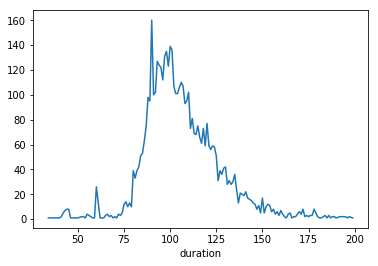

In [81]:
imdb.duration[(imdb.duration < 200) & (imdb.duration > 30)].groupby(imdb.duration).count().plot()